# Hierarchical Agglomeration
![](banner_ha.jpg)
_<p style="text-align: center;"> Macaque monkeys at the top of the hierarchy take the best bathing spots. </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                                
update_geom_defaults("point", list(size=6, colour="grey40"))
update_geom_defaults("text", list(hjust=0.4, vjust=0.4, colour="white"))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

## Synopsis

**Terms**
* Hierachical agglomeration
* Dissimilarity measure
* Dissimilarity matrix
* Cluster linkage
* Dendrogram
* Cutline

## Exposition

### Data

In [2]:
datax = data.frame(x1=c(2, 2, 3, 5, 10, 12), x2=c(1, 4, 4, 4, 4, 4))
data = datax
data %>% caption(row.names=TRUE)

,x1,x2
1,2,1
2,2,4
3,3,4
4,5,4
5,10,4
6,12,4


### Initial State

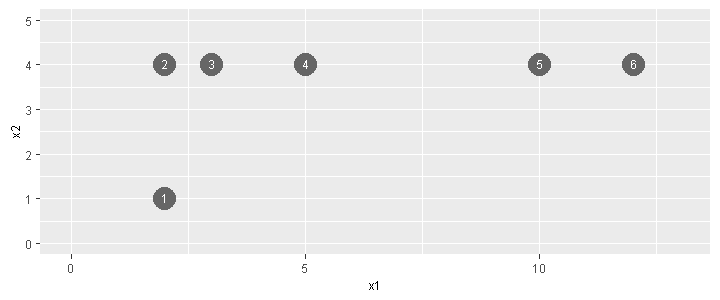

In [3]:
output_size(6,2.5)
ggplot(datax) + xlim(0,13) + ylim(0, 5) +
geom_point(aes(x=x1, y=x2)) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)))

In [4]:
dm = dist(data, "euclidean", diag=TRUE)
           
height = c()
height[1] = min(dm)
          
row.arrange(data %>% captionx(row.names=TRUE),
            fmt.dm(dm) %>% captionx("dissimilarity matrix", row.names=TRUE),
            sprintf("%0.4f", height[1]) %>% fmt("dissimilarity") %>% captionx("min"))

data 
 
 
 
 x1 
 x2 
 
 
 
 
 1 
 2 
 1 
 
 
 2 
 2 
 4 
 
 
 3 
 3 
 4 
 
 
 4 
 5 
 4 
 
 
 5 
 10 
 4 
 
 
 6 
 12 
 4 
 
 
 
 dissimilarity matrix 
 
 
 
 1 
 2 
 3 
 4 
 5 
 6 
 
 
 
 
 1 
 0.0000 
 3.0000 
 3.1623 
 4.2426 
 8.5440 
 10.4403 
 
 
 2 
 3.0000 
 0.0000 
 1.0000 
 3.0000 
 8.0000 
 10.0000 
 
 
 3 
 3.1623 
 1.0000 
 0.0000 
 2.0000 
 7.0000 
 9.0000 
 
 
 4 
 4.2426 
 3.0000 
 2.0000 
 0.0000 
 5.0000 
 7.0000 
 
 
 5 
 8.5440 
 8.0000 
 7.0000 
 5.0000 
 0.0000 
 2.0000 
 
 
 6 
 10.4403 
 10.0000 
 9.0000 
 7.0000 
 2.0000 
 0.0000 
 
 
 
 min 
 
 
 dissimilarity 
 
 
 
 
 1.0000

### Agglomerate Clusters

**Step 1**

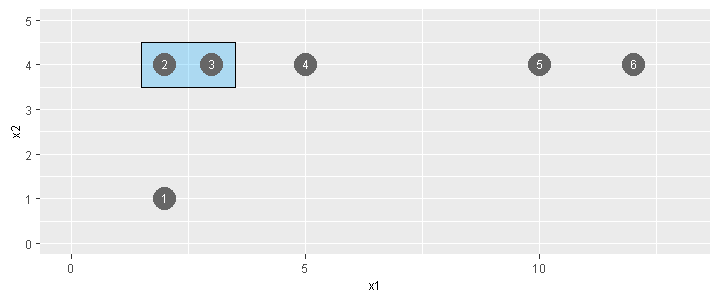

In [5]:
output_size(6,2.5)
ggplot(datax) +xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=3.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_point(aes(x=x1, y=x2)) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)))

In [6]:
data = rbind(data[setdiff(row.names(data), c("2","3")),],
             data.frame(x1=mean(datax[c("2","3"),"x1"]), x2=mean(datax[c("2","3"),"x2"])))
row.names(data)[nrow(data)] = "A"

dm = dist(data, "euclidean", diag=TRUE)
height[2] = min(dm)
          
row.arrange(data %>% captionx(row.names=TRUE),
            fmt.dm(dm) %>% captionx("dissimilarity matrix", row.names=TRUE),
            sprintf("%0.4f", height[2]) %>% fmt("dissimilarity") %>% captionx("min"))

data 
 
 
 
 x1 
 x2 
 
 
 
 
 1 
 2.0 
 1 
 
 
 4 
 5.0 
 4 
 
 
 5 
 10.0 
 4 
 
 
 6 
 12.0 
 4 
 
 
 A 
 2.5 
 4 
 
 
 
 dissimilarity matrix 
 
 
 
 1 
 4 
 5 
 6 
 A 
 
 
 
 
 1 
 0.0000 
 4.2426 
 8.5440 
 10.4403 
 3.0414 
 
 
 4 
 4.2426 
 0.0000 
 5.0000 
 7.0000 
 2.5000 
 
 
 5 
 8.5440 
 5.0000 
 0.0000 
 2.0000 
 7.5000 
 
 
 6 
 10.4403 
 7.0000 
 2.0000 
 0.0000 
 9.5000 
 
 
 A 
 3.0414 
 2.5000 
 7.5000 
 9.5000 
 0.0000 
 
 
 
 min 
 
 
 dissimilarity 
 
 
 
 
 2.0000

**Step 2**

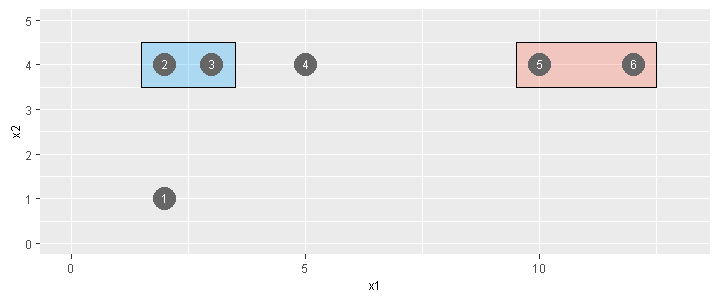

In [7]:
output_size(6,2.5)
ggplot(datax) +xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=3.5,  ymin=3.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2)) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)))

In [8]:
data = rbind(data[setdiff(row.names(data), c("5","6")),],
             data.frame(x1=mean(datax[c("5","6"),"x1"]), x2=mean(datax[c("5","6"),"x2"])))
row.names(data)[nrow(data)] = "B"

dm = dist(data, "euclidean", diag=TRUE)
height[3] = min(dm)
          
row.arrange(data %>% captionx(row.names=TRUE),
            fmt.dm(dm) %>% captionx("dissimilarity matrix", row.names=TRUE),
            sprintf("%0.4f", height[3]) %>% fmt("dissimilarity") %>% captionx("min"))

data 
 
 
 
 x1 
 x2 
 
 
 
 
 1 
 2.0 
 1 
 
 
 4 
 5.0 
 4 
 
 
 A 
 2.5 
 4 
 
 
 B 
 11.0 
 4 
 
 
 
 dissimilarity matrix 
 
 
 
 1 
 4 
 A 
 B 
 
 
 
 
 1 
 0.0000 
 4.2426 
 3.0414 
 9.4868 
 
 
 4 
 4.2426 
 0.0000 
 2.5000 
 6.0000 
 
 
 A 
 3.0414 
 2.5000 
 0.0000 
 8.5000 
 
 
 B 
 9.4868 
 6.0000 
 8.5000 
 0.0000 
 
 
 
 min 
 
 
 dissimilarity 
 
 
 
 
 2.5000

**Step 3**

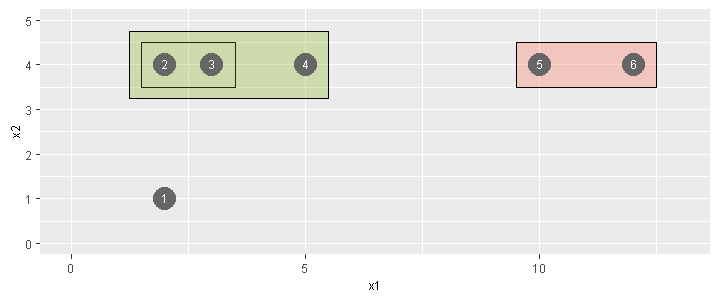

In [9]:
output_size(6,2.5)
ggplot(datax) +xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5,  xmax=3.5,  ymin=3.5,  ymax=4.5,  color="black", fill=NA) +
geom_rect(xmin=9.5,  xmax=12.5, ymin=3.5,  ymax=4.5,  color="black", fill=PALETTE[2], alpha=0.05) +
geom_rect(xmin=1.25, xmax=5.5,  ymin=3.25, ymax=4.75, color="black", fill=PALETTE[3], alpha=0.05) +
geom_point(aes(x=x1, y=x2)) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)))

In [10]:
data = rbind(data[setdiff(row.names(data), c("A","4")),],
             data.frame(x1=mean(datax[c("2","3","4"),"x1"]), x2=mean(datax[c("2","3","4"),"x2"])))
row.names(data)[nrow(data)] = "C"

dm = dist(data, "euclidean", diag=TRUE)
height[4] = min(dm)
          
row.arrange(data %>% captionx(row.names=TRUE),
            fmt.dm(dm) %>% captionx("dissimilarity matrix", row.names=TRUE),
            sprintf("%0.4f", height[4]) %>% fmt("dissimilarity") %>% captionx("min"))

data 
 
 
 
 x1 
 x2 
 
 
 
 
 1 
 2.000000 
 1 
 
 
 B 
 11.000000 
 4 
 
 
 C 
 3.333333 
 4 
 
 
 
 dissimilarity matrix 
 
 
 
 1 
 B 
 C 
 
 
 
 
 1 
 0.0000 
 9.4868 
 3.2830 
 
 
 B 
 9.4868 
 0.0000 
 7.6667 
 
 
 C 
 3.2830 
 7.6667 
 0.0000 
 
 
 
 min 
 
 
 dissimilarity 
 
 
 
 
 3.2830

**Step 4**

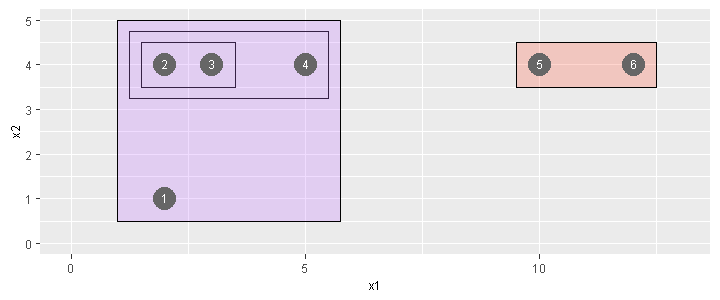

In [11]:
output_size(6,2.5)
ggplot(datax) +xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5,  xmax=3.5,  ymin=3.5,  ymax=4.5,  color="black", fill=NA) +
geom_rect(xmin=9.5,  xmax=12.5, ymin=3.5,  ymax=4.5,  color="black", fill=PALETTE[2], alpha=0.05) +
geom_rect(xmin=1.25, xmax=5.5,  ymin=3.25, ymax=4.75, color="black", fill=NA) +
geom_rect(xmin=1,    xmax=5.75, ymin=0.5,  ymax=5,    color="black", fill=PALETTE[4], alpha=0.05) +
geom_point(aes(x=x1, y=x2)) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)))

In [12]:
data = rbind(data[setdiff(row.names(data), c("C","1")),],
             data.frame(x1=mean(datax[c("1","2","3","4"),"x1"]), x2=mean(datax[c("1","2","3","4"),"x2"])))
row.names(data)[nrow(data)] = "D"

dm = dist(data, "euclidean", diag=TRUE)
height[5] = min(dm)
          
row.arrange(data %>% captionx(row.names=TRUE),
            fmt.dm(dm) %>% captionx("dissimilarity matrix", row.names=TRUE),
            sprintf("%0.4f", height[5]) %>% fmt("dissimilarity") %>% captionx("min"))

data 
 
 
 
 x1 
 x2 
 
 
 
 
 B 
 11 
 4.00 
 
 
 D 
 3 
 3.25 
 
 
 
 dissimilarity matrix 
 
 
 
 B 
 D 
 
 
 
 
 B 
 0.0000 
 8.0351 
 
 
 D 
 8.0351 
 0.0000 
 
 
 
 min 
 
 
 dissimilarity 
 
 
 
 
 8.0351

**Step 5**

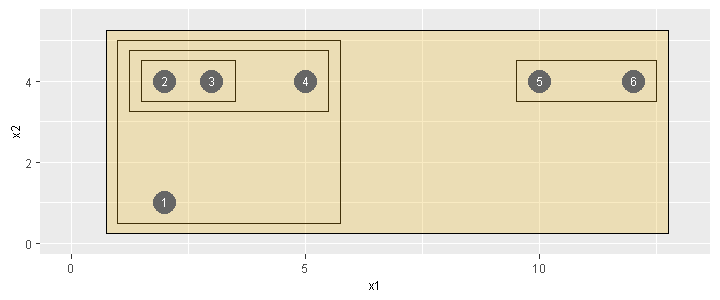

In [13]:
output_size(6,2.5)
ggplot(datax) +xlim(0,13) + ylim(0, 5.5) +
geom_rect(xmin=1.5,  xmax=3.5,   ymin=3.5,  ymax=4.5,  color="black", fill=NA) +
geom_rect(xmin=9.5,  xmax=12.5,  ymin=3.5,  ymax=4.5,  color="black", fill=NA) +
geom_rect(xmin=1.25, xmax=5.5,   ymin=3.25, ymax=4.75, color="black", fill=NA) +
geom_rect(xmin=1,    xmax=5.75,  ymin=0.5,  ymax=5,    color="black", fill=NA) +
geom_rect(xmin=0.75, xmax=12.75, ymin=0.25, ymax=5.25, color="black", fill=PALETTE[5], alpha=0.05) +
geom_point(aes(x=x1, y=x2)) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)))

In [14]:
data = rbind(data[setdiff(row.names(data), c("D","B")),],
             data.frame(x1=mean(datax[c("1","2","3","4","5","6"),"x1"]), x2=mean(datax[c("1","2","3","4","5","6"),"x2"])))
row.names(data)[nrow(data)] = "E"
data %>% caption(row.names=TRUE)

,x1,x2
E,5.666667,3.5


### Dendrogram

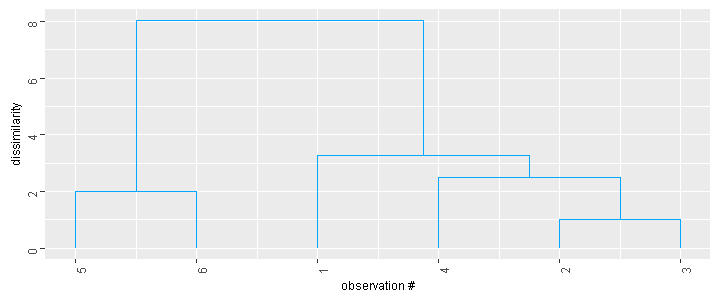

In [15]:
tree = hclust(dist(datax, "euclidean"), method="centroid")
tree$height = height # why does stats/hclust centroid produce different heights?
ggdendrogram(tree, theme_dendro=FALSE) + xlab("observation #") + ylab("dissimilarity")

### Commit Cluster Assignments

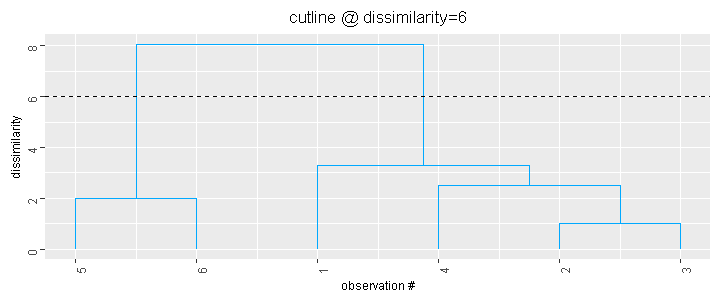

In [16]:
ggdendrogram(tree, theme_dendro=FALSE) +
geom_hline(yintercept=6, lty="dashed") +
ggtitle("cutline @ dissimilarity=6") + xlab("observation #") + ylab("dissimilarity")

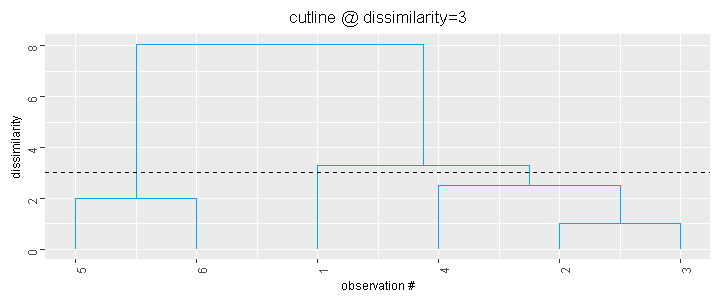

In [17]:
ggdendrogram(tree, theme_dendro=FALSE) +
geom_hline(yintercept=3, lty="dashed") +
ggtitle("cutline @ dissimilarity=3") + xlab("observation #") + ylab("dissimilarity")

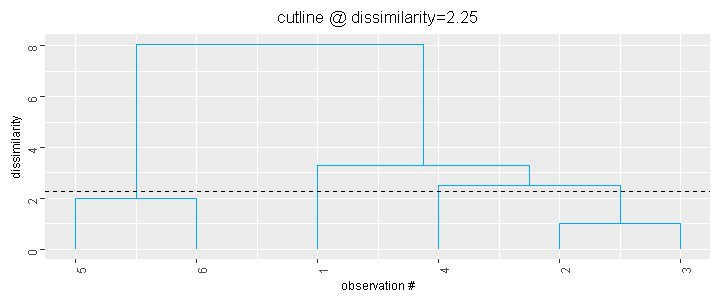

In [18]:
ggdendrogram(tree, theme_dendro=FALSE) +
geom_hline(yintercept=2.25, lty="dashed") +
ggtitle("cutline @ dissimilarity=2.25") + xlab("observation #") + ylab("dissimilarity")

In [19]:
row.arrange(data.frame(datax, cluster=cutree(tree, h=6))    %>% captionx("cutline @ dissimilarity=6",    row.names=TRUE),
            data.frame(datax, cluster=cutree(tree, h=3))    %>% captionx("cutline @ dissimilarity=3",    row.names=TRUE),
            data.frame(datax, cluster=cutree(tree, h=2.25)) %>% captionx("cutline @ dissimilarity=2.25", row.names=TRUE))

,x1,x2,cluster
1,2,1,1
2,2,4,1
3,3,4,1
4,5,4,1
5,10,4,2
6,12,4,2
,x1,x2,cluster
1,2,1,1
2,2,4,2
3,3,4,2


## Code

### Useful Functions

### Templates

## Expectations

Know about this:



## Further Reading



<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 20, 2019
</span>
</p>